В чем проблема **GridSearch** / **RandomizedSearch**?

- можно легко "промахнуться"
- не учитывается информация о предыдущих запусках
- при росте количества гиперпараметров количество запусков для полного/частичного перебора значительно возрастает

### Sequential Model-Based Optimization


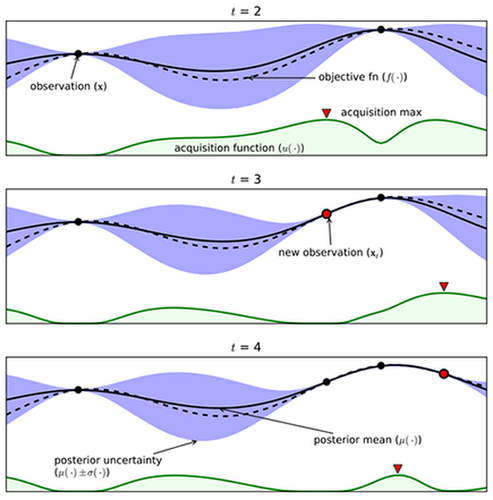


На каждом шаге работы SMBO:

- Строится вероятностная модель (суррогатная функция) целевой функции.
- Подбираются гиперпараметры, которые лучше всего подходят для вероятностной модели.
- Подобранные гиперпараметры применяются к целевой функции.
- Вероятностная модель перестраивается (обновляется).
- Шаги 2-4 повторяются столько раз, сколько задал пользователь.

Tree-structured parzen estimator (TPE) - вариант SMBO

In [ ]:
!pip install optuna > None

In [ ]:
import optuna

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
X, y  = load_iris(return_X_y=True, as_frame=True)

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-18 20:36:36,873] A new study created in memory with name: no-name-ba771866-ee7e-4da6-b697-9d75f0e2edbb
[I 2023-01-18 20:36:36,936] Trial 0 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9}. Best is trial 0 with value: 0.9466666666666667.
[I 2023-01-18 20:36:36,962] Trial 1 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 1.4253069274207861e-08}. Best is trial 0 with value: 0.9466666666666667.
[I 2023-01-18 20:36:36,984] Trial 2 finished with value: 0.9733333333333333 and parameters: {'classifier': 'SVC', 'svc_c': 1.6967404561455204}. Best is trial 2 with value: 0.9733333333333333.
[I 2023-01-18 20:36:37,015] Trial 3 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 1.5286065867645294e-06}. Best is trial 2 with value: 0.9733333333333333.
[I 2023-01-18 20:36:37,076] Trial 4 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 

In [ ]:
print(study.best_trial)

FrozenTrial(number=63, state=TrialState.COMPLETE, values=[0.9866666666666667], datetime_start=datetime.datetime(2023, 1, 18, 20, 36, 39, 161993), datetime_complete=datetime.datetime(2023, 1, 18, 20, 36, 39, 208839), params={'classifier': 'SVC', 'svc_c': 4.357192169226074}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'svc_c': FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None)}, trial_id=63, value=None)


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)